In [73]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [31]:
#link = "http://lib.stat.cmu.edu/datasets/veteran"
#w = requests.get(link)
#txt=w.text
#f = open("data/lung_cancer2.txt", "w")
#f.write(txt.replace('     ',',')  )
#f.close()

In [56]:
data = pd.read_csv('data/lung_cancer2.txt', sep=",", header=None)
data.columns = ["Treatment", "Celltype", "Survival", "Status","Karnofsky score","Months from Diagnosis","Age","Prior therapy"]

In [57]:
data

,Treatment,Celltype,Survival,Status,Karnofsky score,Months from Diagnosis,Age,Prior therapy
0,1,1,72,1,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
132,2,4,133,1,75,1,65,0
133,2,4,111,1,60,5,64,0
134,2,4,231,1,70,18,67,10
135,2,4,378,1,80,4,65,0


In [110]:
data.describe()

,Treatment,Celltype,Survival,Status,Karnofsky score,Months from Diagnosis,Age,Prior therapy
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.496350,2.335766,121.627737,0.934307,58.569343,8.773723,58.306569,2.919708
std,0.501821,1.066036,157.816722,0.248655,20.039592,10.612141,10.541628,4.563375
min,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,34.000000,0.000000
25%,1.000000,1.000000,25.000000,1.000000,40.000000,3.000000,51.000000,0.000000
50%,1.000000,2.000000,80.000000,1.000000,60.000000,5.000000,62.000000,0.000000
75%,2.000000,3.000000,144.000000,1.000000,75.000000,11.000000,66.000000,10.000000
max,2.000000,4.000000,999.000000,1.000000,99.000000,87.000000,81.000000,10.000000


#### Survival distribution

(array([84., 29., 11.,  7.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([  1. , 100.8, 200.6, 300.4, 400.2, 500. , 599.8, 699.6, 799.4,
        899.2, 999. ]),
 <BarContainer object of 10 artists>)

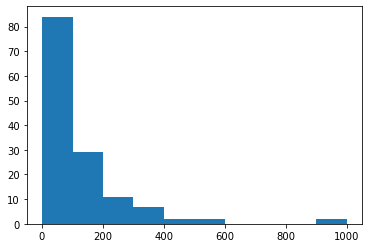

In [58]:
plt.hist(data['Survival'])

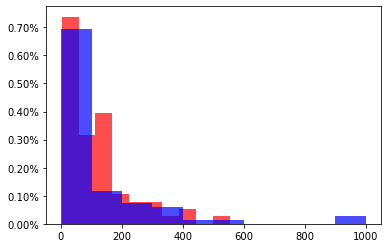

In [108]:
plt.hist(data[data['Treatment']==1]['Survival'],10, density=True,color='r',alpha=0.7)
plt.hist(data[data['Treatment']==2]['Survival'],10, density=True,color='b',alpha=0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Analysis

### Kaplan-Meier

In [111]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [112]:
kmf.fit(data['Survival'], data['Status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 137 total observations, 9 right-censored observations>

<Axes: xlabel='timeline'>

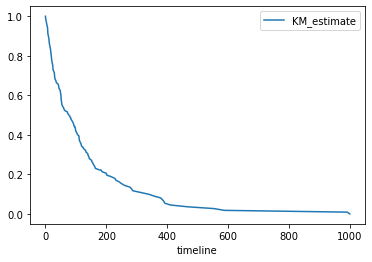

In [113]:
kmf.survival_function_.plot()

<Axes: xlabel='timeline'>

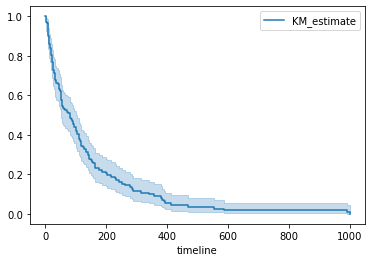

In [114]:
kmf.plot_survival_function()

In [115]:
kmf.median_survival_time_

80.0

In [116]:
survival_probabilities = kmf.survival_function_.reset_index()
survival_probabilities

,timeline,KM_estimate
0,0.0,1.000000
1,1.0,0.985401
2,2.0,0.978102
3,3.0,0.970803
4,4.0,0.963504
...,...,...
97,467.0,0.036018
98,553.0,0.027014
99,587.0,0.018009
100,991.0,0.009005


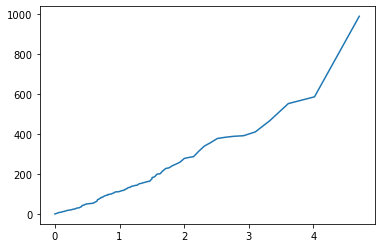

In [119]:
plt.plot(-np.log(survival_probabilities['KM_estimate']),survival_probabilities['timeline'])

`-log(survival)` allows to tell if the distribution is similar to expotential. (the straighter the line, the closer)

### Stratification

In [122]:
data["Celltype"].unique()

array([1, 2, 3, 4], dtype=int64)

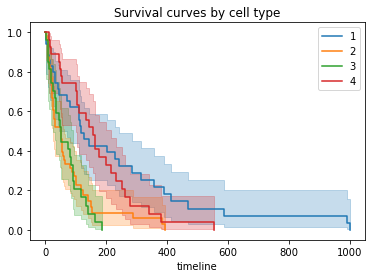

In [126]:
def plot_km_curve_by_cell(data):
    cell_types = data["Celltype"].unique()
    for cell_type in cell_types:
        data_cell_type = data.loc[data["Celltype"] == cell_type]
        kmf = KaplanMeierFitter()
        kmf.fit(durations=data_cell_type["Survival"],event_observed=data_cell_type["Status"])
        kmf.plot(label=cell_type)

    plt.legend()
    plt.title("Survival curves by cell type")
    
plot_km_curve_by_cell(data)